# Olympic Games Project

## Introduction

- The data includes 120 years (1896 to 2016) of Olympic games with information about athletes and medal results.
- We'll focus on exploring the dataset by practicing the summary statistics and data visualization techniques.
- Check out the source if you are interested in using this data (https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results)

## Dataset Description:

We'll work on the data within athlete_events.csv. 

Each row corresponds to an individual athlete competing in an individual Olympic event.

The columns are:
- **ID**: Unique number for each athlete
- **Name**: Athlete's name
- **Sex**: M or F
- **Age**: Integer
- **Height**: In centimeters
- **Weight**: In kilograms
- **Team**: Team name
- **NOC**: National Olympic Committee 3-letter code
- **Games**: Year and season
- **Year**: Integer
- **Season**: Summer or Winter
- **City**: Host city
- **Sport**: Sport
- **Event**: Event
- **Medal**: Gold, Silver, Bronze, or NA

## Objective: 
   - Explore the dataset
   - Explore relationships of multiple features via statistics and plots

In [1]:
# Lets import the libraries Pandas and Seaborn

import pandas as pd
import seaborn as sns

In [2]:
# Lets import the data from csv file

olympics = pd.read_csv("C:\\Users\\sarva\\Downloads\\athlete_events.csv")

df = olympics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# To check the numerical columns

df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
# Let us check for missing values in our dataset

df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >]], dtype=object)

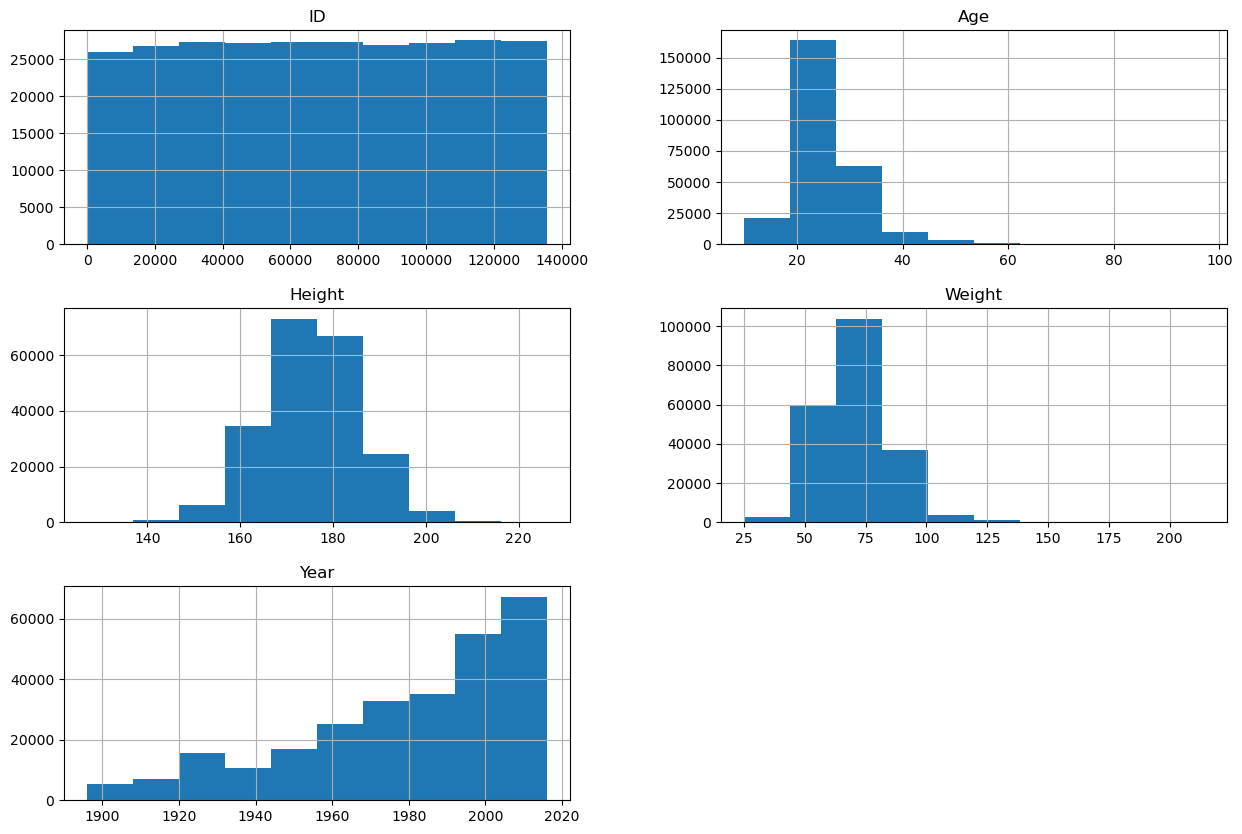

In [7]:
# Let's plot histograms of the numerical columns

df.hist(figsize=(15, 10))

We can notice that there could be outliers for `Age`, `Weight`, `Height`. But let's focus only on `Age`.

In [8]:
import warnings

warnings.filterwarnings("ignore", message="The figure layout has changed to tight")


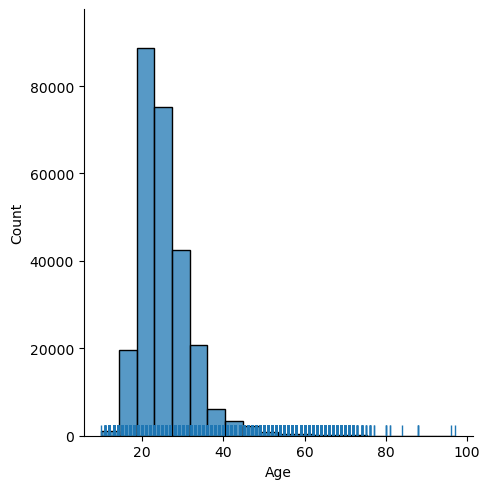

In [9]:
# Let's plot the histogram with a rug plot of the column `Age` using `Seaborn`, with both 20 and 50 bins

sns.displot(data=df, x='Age', bins=20, rug=True)

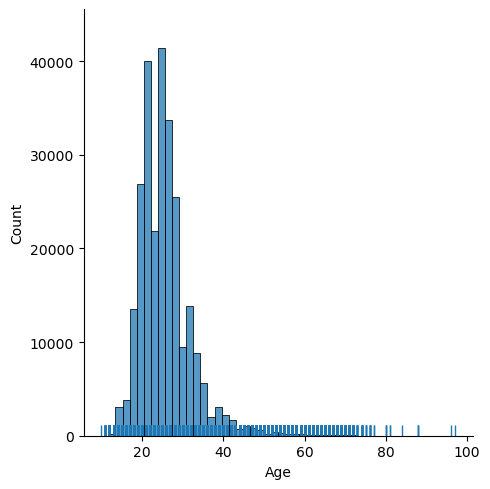

In [10]:
sns.displot(data=df, x='Age', bins=50, rug=True)

We can see the slight changes of distributions of `Age` when the number of bins changes.

<Axes: >

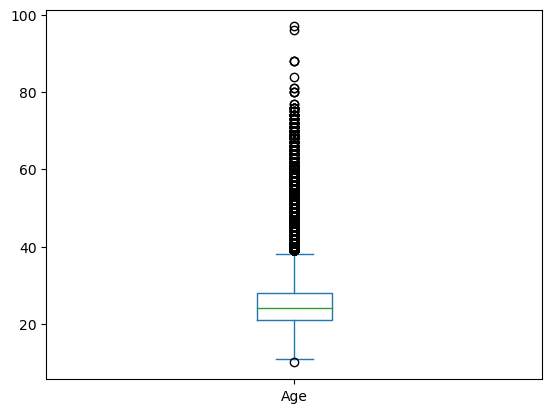

In [11]:
#Let's plot the boxplot of the column `Age` using `Pandas`

df['Age'].plot(kind='box')

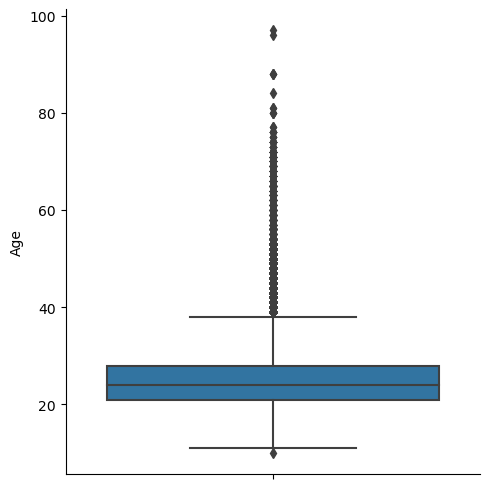

In [12]:
# Let's plot the boxplot of the column `Age` using `Seaborn`

sns.catplot(data=df, y='Age', kind='box')

In [13]:
# Let's calculate the first quartile, third quartile, and IQR of the column `Age`

Q1 = olympics['Age'].quantile(0.25)
Q3 = olympics['Age'].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

21.0
28.0
7.0


In [14]:
# Let's see the average Age, Height, Weight of female versus male Olympic athletes

df.groupby('Sex')[['Age','Height','Weight']].mean()

,Age,Height,Weight
Sex,,,
F,23.732881,167.839740,60.021252
M,26.277562,178.858463,75.743677


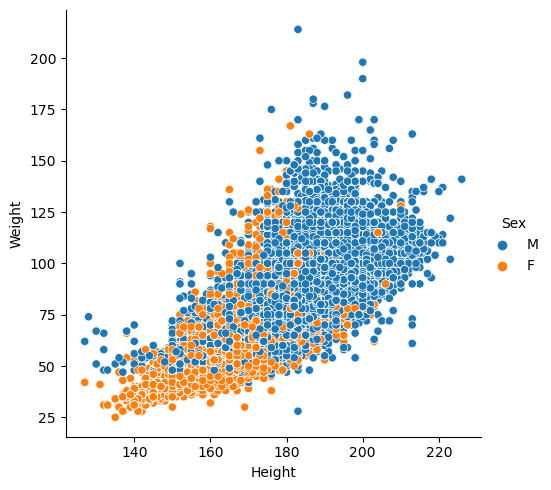

In [15]:
# Let's plot the scatterplot of Height and Weight, using different colors for different Sex

sns.relplot(data=df, x='Height', y='Weight', hue='Sex')

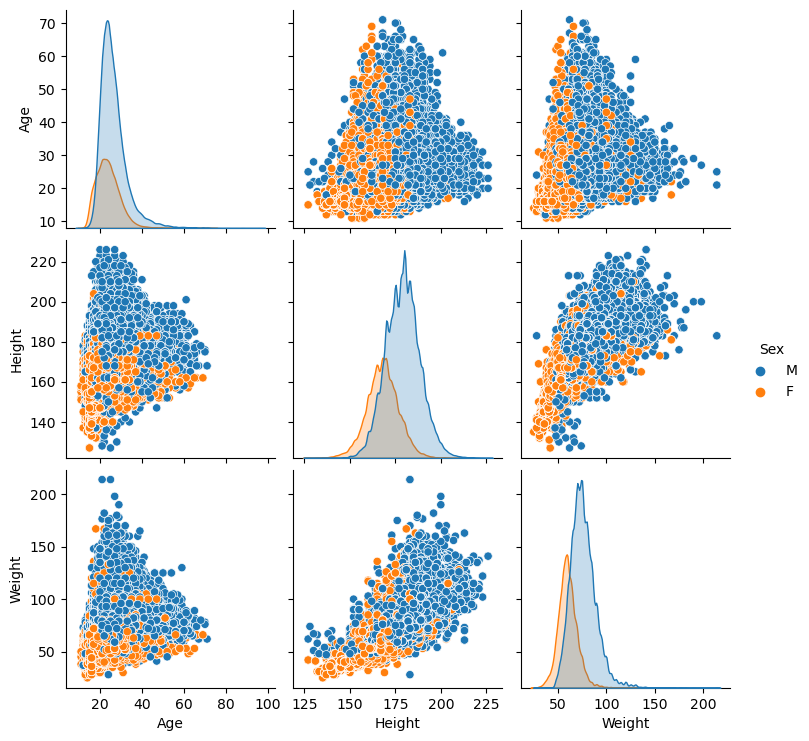

In [16]:
# Let's plot the pairwise relationships of Age, Height, Weight, with different colors for Sex

sns.pairplot(df[['Age','Height','Weight','Sex']], hue='Sex')

In [17]:
df[['Age', 'Height', 'Weight']].corr()

,Age,Height,Weight
Age,1.000000,0.138246,0.212069
Height,0.138246,1.000000,0.796213
Weight,0.212069,0.796213,1.000000


<Axes: >

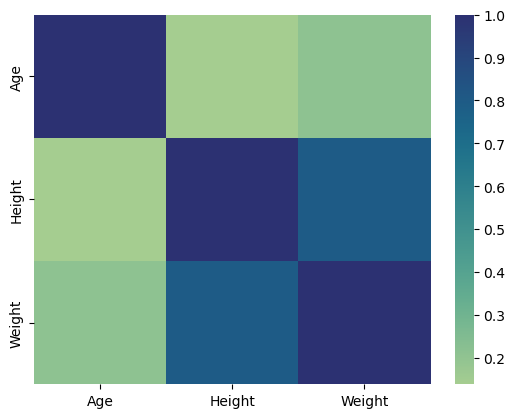

In [18]:
# Let's use heatmap to demonstrate the correlation matrix of Age, Height, Weight

sns.heatmap(df[['Age', 'Height', 'Weight']].corr(), cmap='crest')

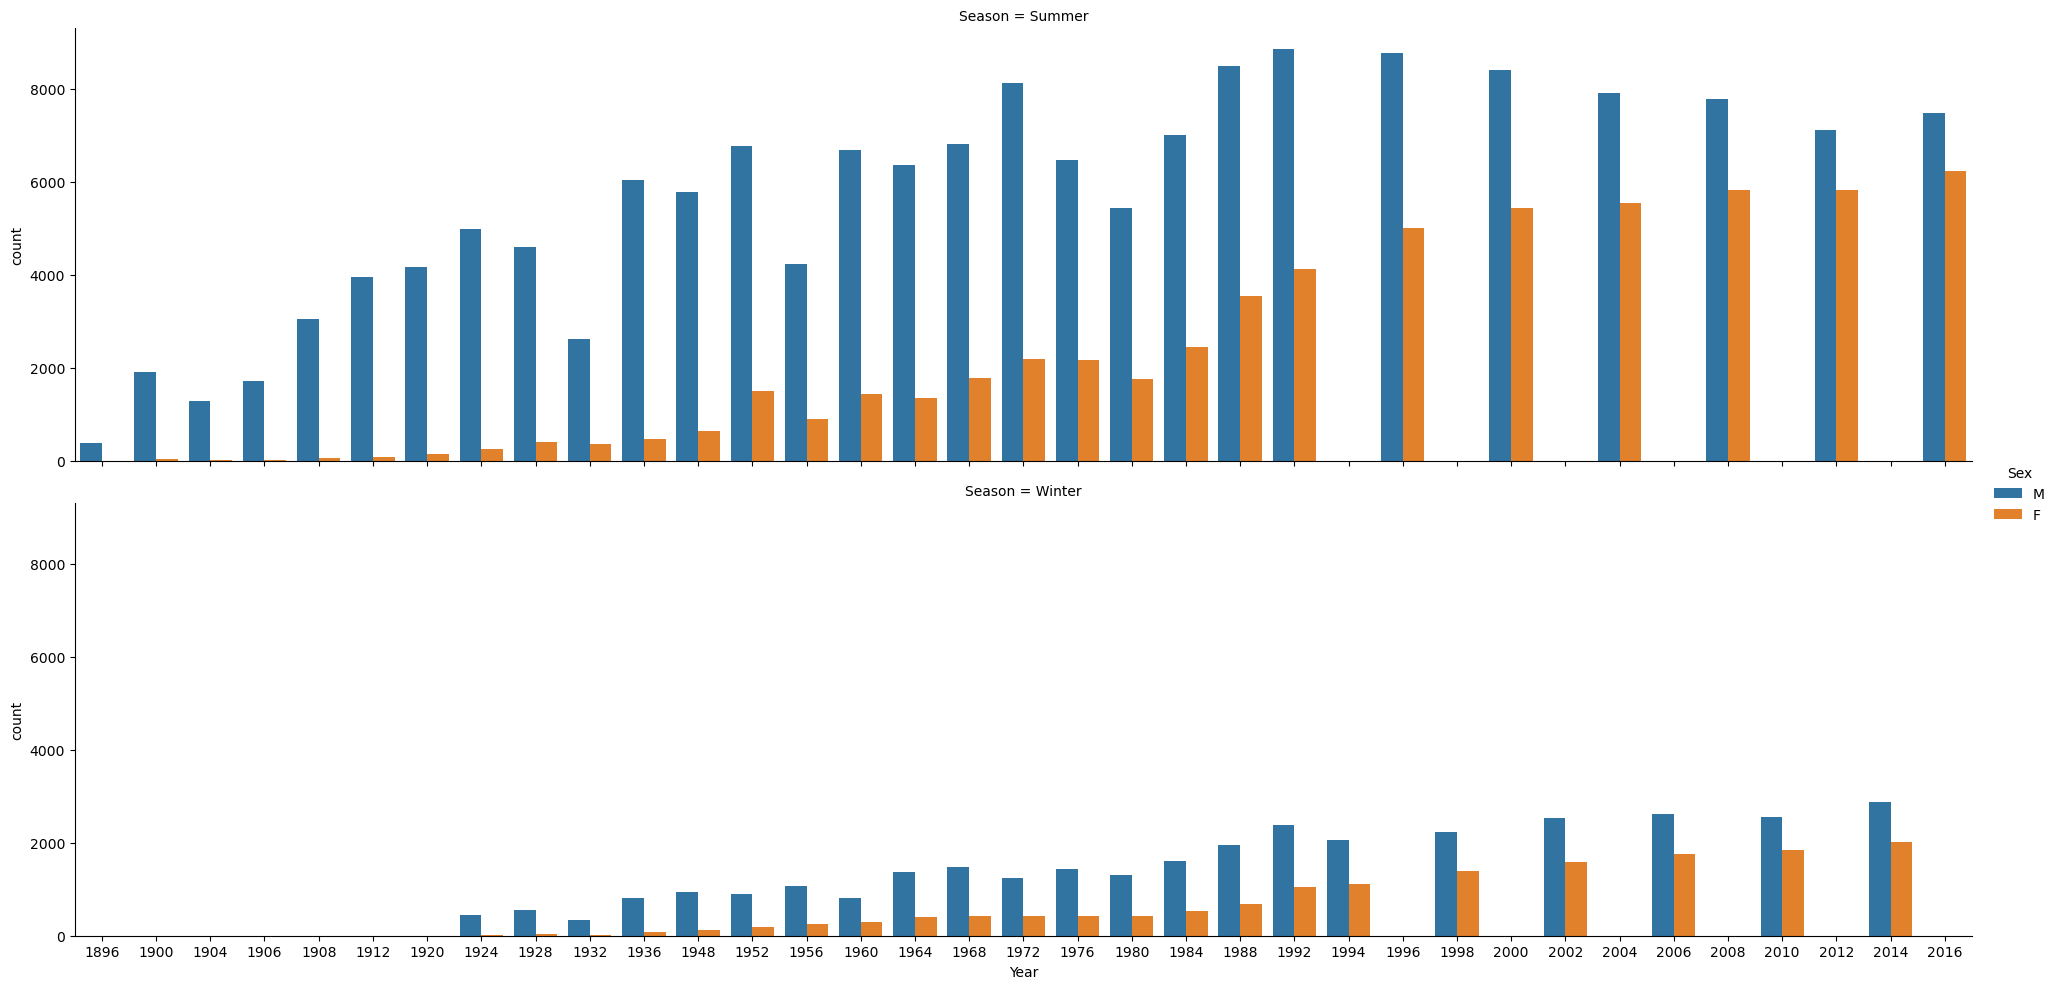

In [19]:
# Let's use count plots to look at the changes of number of athlete-events across Year, for different Sex by colors, and different Season on separate plots

sns.catplot(data=df, x='Year', hue='Sex', kind='count', col='Season', col_wrap=1, aspect=4)

We can see that there is an obvious increase of female athlete-events in the Olympics across years.

# Conclusion

In this project the main focus as mentioned in the objective was to explore the data and utilize statistics and visualization using Python libraries (Pandas and Seaborn) for the exploration. The steps above have resulted in an understanding and identifying of the data, trends and patterns.